In [ ]:
                                          # Potato Disease Classification

Import all the Libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt



In [2]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=30

# Import data into tensorflow dataset object

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "mrdata",
    seed=1,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 2 0 2 1 0 1 1 0 1 0 1 0 0 0]


# displaying some random pictures

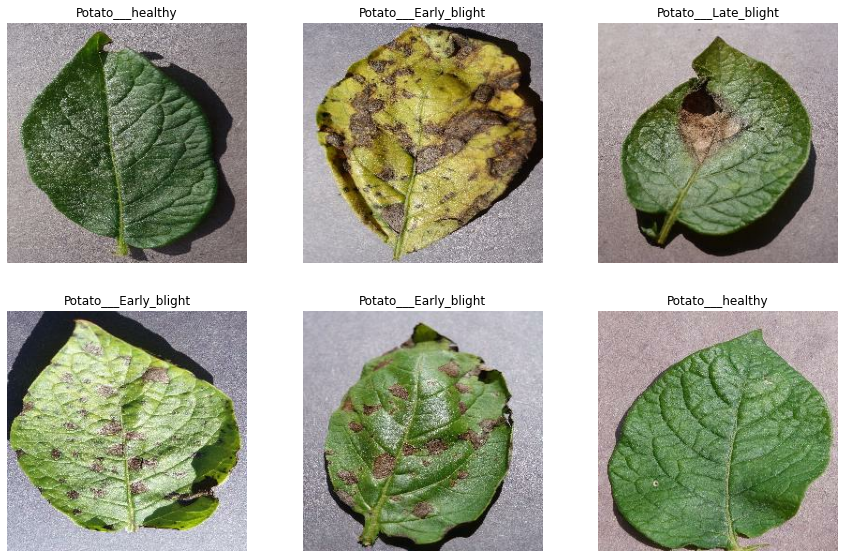

In [6]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# spiliting data_set

In [7]:
train_size = 0.8
len(dataset)*train_size


54.400000000000006

In [8]:
train_dataset = dataset.take(54)
len(train_dataset)

54

In [9]:
test_dataset = dataset.skip(54)
len(test_dataset)

14

In [10]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [11]:
val_dataset = test_dataset.take(6)
len(val_dataset)

6

In [12]:
test_dataset = test_dataset.skip(6)
len(test_dataset)

8

Building the Model
Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.Building the Model
Creating a Layer for Resizing and Normalization
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

In [13]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [14]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=13,
)

Epoch 1/13
54/54 [==============================] - 144s 3s/step - loss: 0.1134 - accuracy: 0.9554 - val_loss: 0.0705 - val_accuracy: 0.9740
Epoch 2/13
54/54 [==============================] - 146s 3s/step - loss: 0.0690 - accuracy: 0.9769 - val_loss: 0.2391 - val_accuracy: 0.9219
Epoch 3/13
54/54 [==============================] - 145s 3s/step - loss: 0.0736 - accuracy: 0.9711 - val_loss: 0.0680 - val_accuracy: 0.9844
Epoch 4/13
54/54 [==============================] - 145s 3s/step - loss: 0.0528 - accuracy: 0.9832 - val_loss: 0.0582 - val_accuracy: 0.9844
Epoch 5/13
54/54 [==============================] - 144s 3s/step - loss: 0.1112 - accuracy: 0.9572 - val_loss: 0.0707 - val_accuracy: 0.9844
Epoch 6/13
54/54 [==============================] - 145s 3s/step - loss: 0.0620 - accuracy: 0.9763 - val_loss: 0.1083 - val_accuracy: 0.9583
Epoch 7/13
54/54 [==============================] - 148s 3s/step - loss: 0.0358 - accuracy: 0.9907 - val_loss: 0.0324 - val_accuracy: 0.9844
Epoch 8/13
54

In [20]:
scores = model.evaluate(test_dataset)
scores

8/8 [==============================] - 7s 625ms/step - loss: 0.0556 - accuracy: 0.9828


[0.05564812943339348, 0.982758641242981]

In [ ]:
We can see above that we get 98.00% accuracy for our test dataset. This is considered to be a  good accuracy.

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


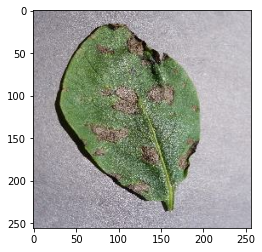

In [26]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[3].numpy().astype('uint8')
    first_label = labels_batch[3].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[3])])
